# Brownian Motion

The purpose of this notebook is to review and illustrate the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) and some of its main properties.

## Definition

**Definition** A standard Brownian motion or Wiener process is a stochastic process $W =\{W_t, t\geq 0\}$ characterised by the following properties:
1. $W_0 = 0$
2. $W_t-W_s \sim N(0, t-s),$ for any $0\leq s \leq t$
3. $W_t$ has independent increments
4. $W_t$ is almost surely continuous.

## Marginal Distributions

Point (2) in the Brownian motion definition implies that for each $t>0$, the one dimensional marginal distribution $W_t$ is normally distributed with expectation zero, and variance equals $t$, i.e.:
\begin{equation}
W_t \sim \mathcal{N}(0,t), \qquad \forall t>0.
\end{equation}

### Expectation,  Variance, and Covariance

So, by definition we have
\begin{equation*}
\mathbf{E} [W_t] = 0 \qquad \forall t\geq 0,
\end{equation*}
and 
\begin{equation*}
\mathbf{Var} [W_t] = t \qquad \forall t> 0.
\end{equation*}

Besides, for any $ t > s >0$, we have
\begin{align*}
\mathbf{Cov} [W_t, W_s] 
                        &= \mathbf{E} [W_t W_s]  =  \mathbf{E} [(W_t-W_s)W_s +  W_s^2]  \\  
                        &= \mathbf{E} [(W_t-W_s)]\mathbf{E}[W_s] +  \mathbf{E}[W_s^2]  \\
                        &= s,\\  
\end{align*}
where the second equality follows by simply using the linearity of the expectation and independent increments property. That is
\begin{equation*}
\mathbf{Cov} [W_t, W_s] = \min\{s, t\}, \qquad \forall s, t>0.
\end{equation*}


### Finite Dimensional Distributions

Moreover, for any finite set $t_1 < t_2 < \cdots < t_m$, the vector $(W_{t_1}, W_{t_2}, \cdots, W_{t_m}),$ follows a Mutivariate normal distribution with zero (zero-vector in $\mathbb{R}^m$) and covariance matrix

$$\Sigma = \begin{pmatrix}
1 & t_1 & t_1 & \cdots & t_1 \\
t_1 & 1 & t_2 & \cdots & t_2 \\
\vdots & \vdots & \vdots & \vdots\\
t_1 & t_2 & t_3 & \cdots & 1 
\end{pmatrix}.$$ 


Hereafter, we will focus on the one dimensional marginal distributions $W_t, t>0$ and will refer to them simply as marginal distributions.

### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal variables allows us to reproduce them with `Python`. 

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  

The next cell shows how to create $W_1$ using this method.

In [31]:
import numpy as np
from scipy.stats import norm
W_1 = norm(loc=0, scale=np.sqrt(1))


Another way to do this  is by creating an object  `BrownianMotion` from `aleatory.processes` and calling the method `get_marginal` on it. 

The next cell shows how to create the marginal $W_1$ using this method.

In [32]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
W_1 = process.get_marginal(t=1)


Hereafter, we will use the latter method to create marginal distributions from Brownian Motion.

### Sampling

Now, let's get a random sample from $W_t$ for any  $t>0$. 

The next cell shows how to get a sample of size 5 from $W_1 \sim\mathcal{N}(0,1)$.

In [33]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
W_t = process.get_marginal(t=1.0) 
W_t.rvs(size=5)

array([-0.25980782, -1.36275388,  1.12150059,  1.76162355, -0.59117951])

Similarly, we can get a sample from $W_{10} \sim \mathcal{N}(0, \sqrt{10})$, as follows

In [34]:
W_t = process.get_marginal(t=10.0)
W_t.rvs(size=5)

array([-3.68855043, -1.23084824, -4.80229623, -3.68564998,  5.41272937])

### Probability Density Functions

The probability density function (pdf) of the marginal distribution $W_t$ is given by the following expression
\begin{equation*}
f(x, t) = \dfrac{1}{\sqrt{2 \pi t}}\exp\left\{ -\dfrac{x^2}{2t}\right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

In order to visualise these functions, we are going to load the library `matplotlib` and set some formatting options.

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

We can plot the pdf of $W_1$ as follows.

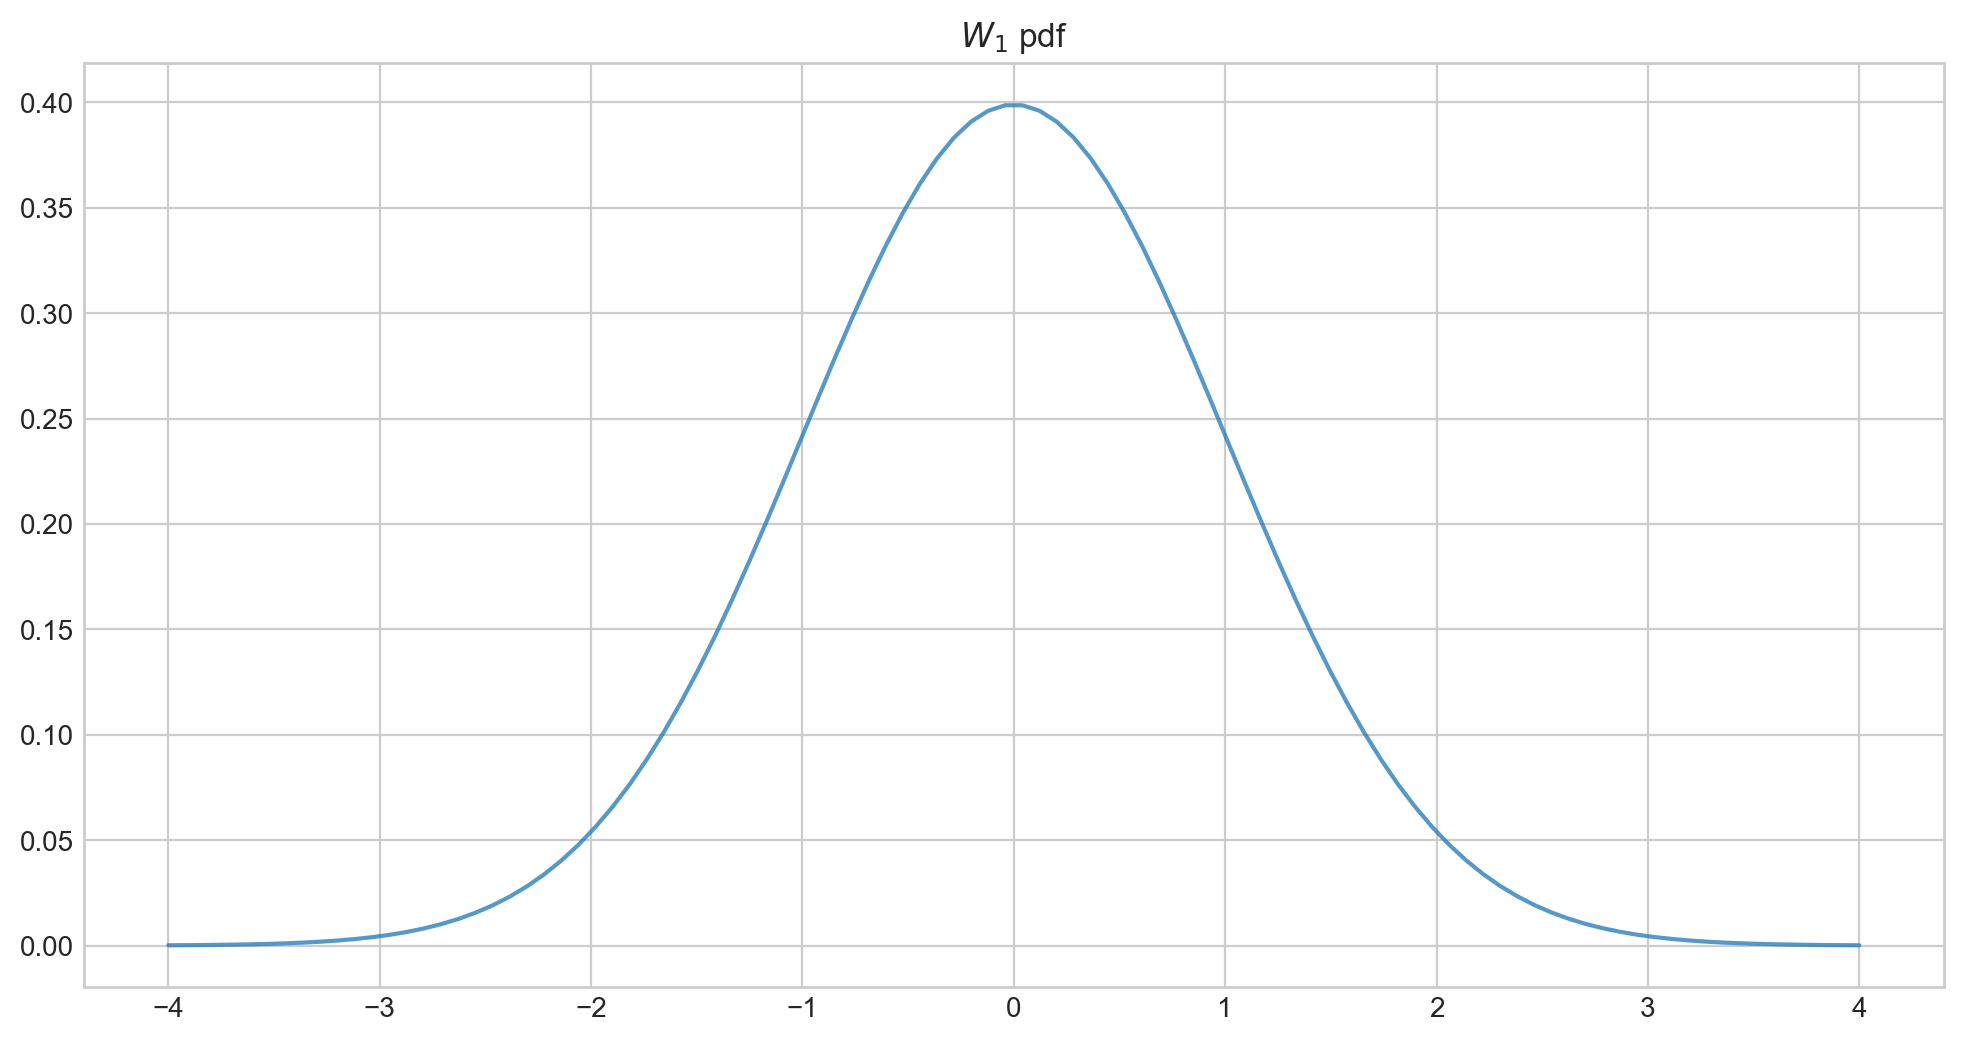

In [37]:
process = BrownianMotion()
W_1 = process.get_marginal(t=1)
x = np.linspace(-4, 4,100)
plt.plot(x, W_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$W_1$ pdf')
plt.show()

Now, ;et's take a look at the pdfs for different marginal distributions $W_t$.

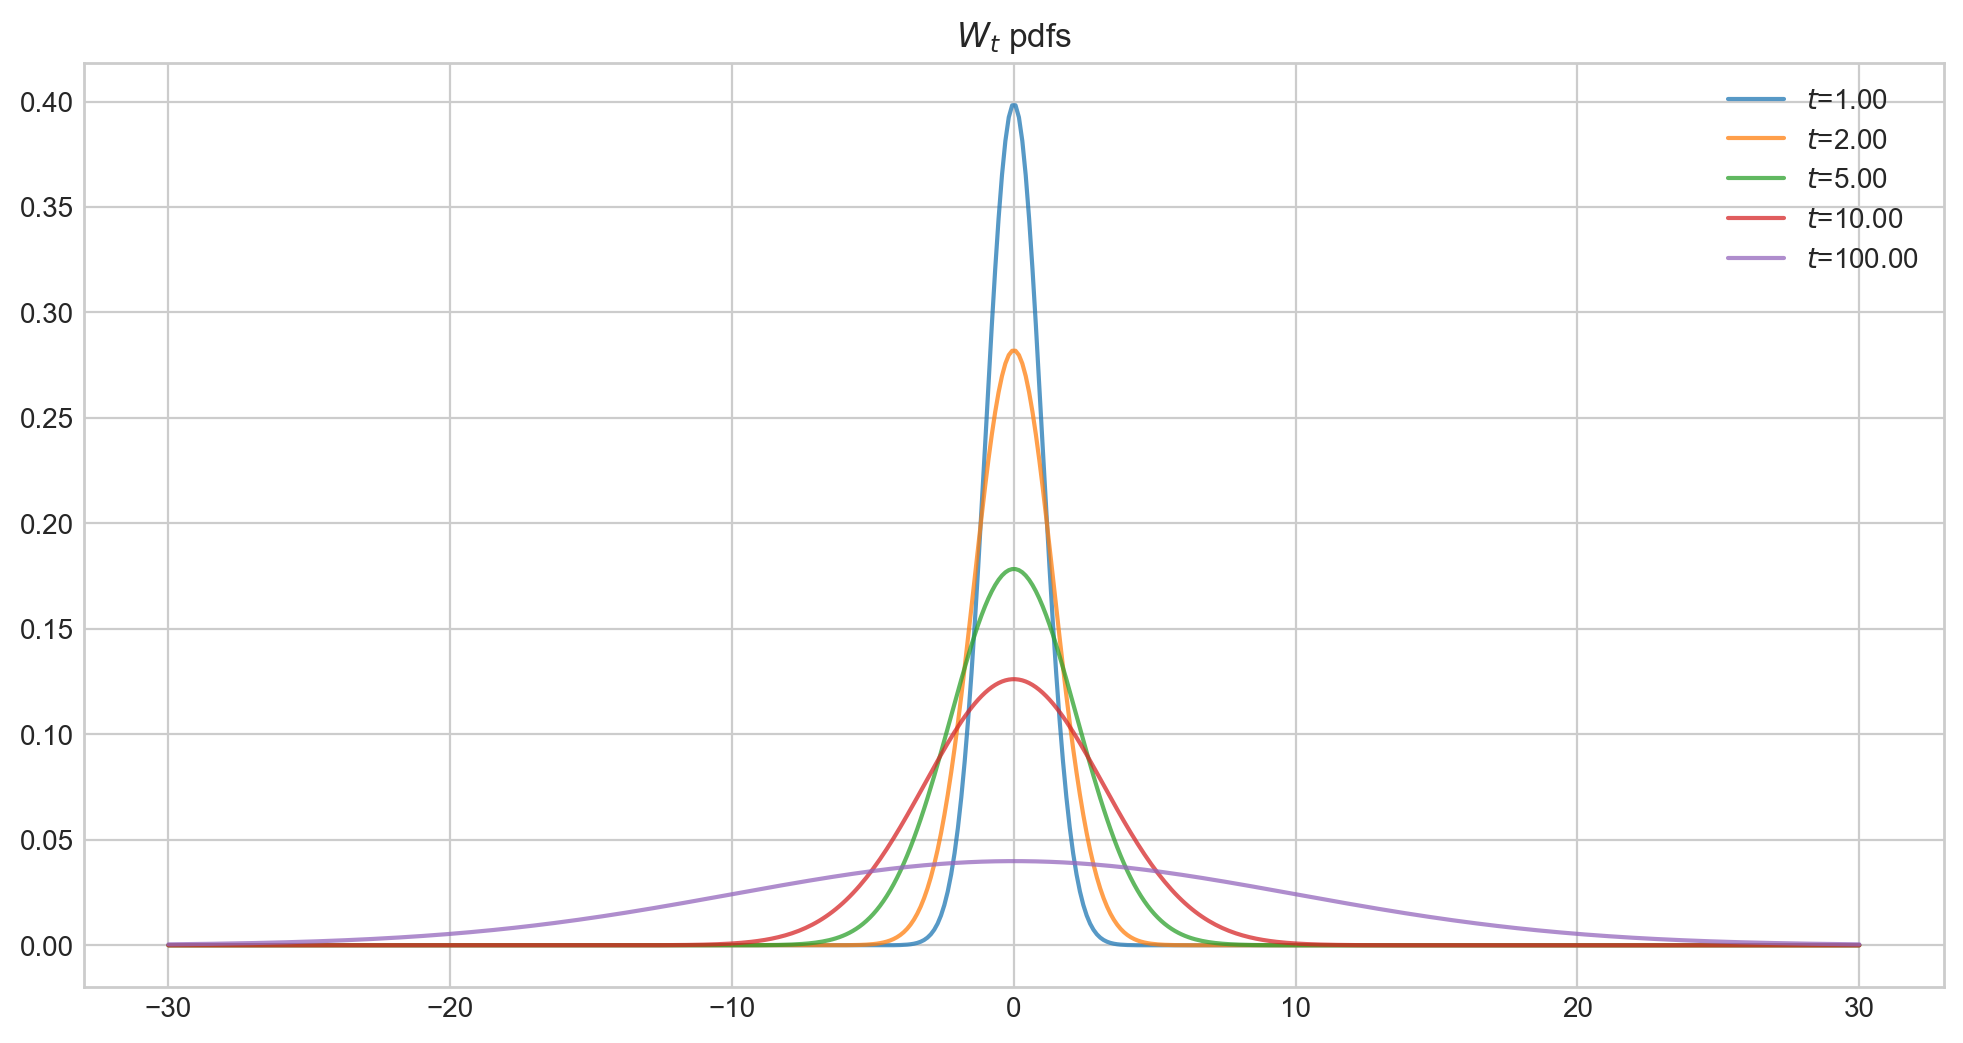

In [38]:
fig, ax1 = plt.subplots(1, 1)
for t in [1,2,5, 10, 100]:
    W_t= process.get_marginal(t)
    x = np.linspace(-30, 30, 500)
    ax1.plot(x, W_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$W_t$ pdfs')
plt.show()

In this chart, we clearly see the characteristic symmetric bell-shaped curves of the normal/Gaussian distribution. 
Moreover, we can make the following observations:
 
- The Brownian motion will take positive and negative values 
- The Brownian motion would take bigger (in magnitude) values as $t$ increases
- The marginal distributions of the Brownian Motion flatten/spread as $t$ increases.

## Simulation

In order to simulate paths from a stochastic process, we need to set a discrete partition over an interval for the simulation to take place. 

For simplicity, we are going to consider an equidistant partition of size $n$ over $[0,T]$, i.e.:
\begin{equation*}
t_i = \frac{i}{n-1} T \qquad  \hbox{for } i = 0, \cdots, n-1.
\end{equation*}
Then, the goal is to simulate a path of the form $\{ W_{t_i} , i=0,\cdots, n-1\}$. Of course, there are different ways to do this. Here, we are going to use the fact tha we can express each $W_{t_i}$ as follows:

\begin{align*}
W_0 &= 0 \\
W_{t_1} = (W_{t_1} - W_0)  + W_0 & \sim N\left(0,\frac{T}{n-1}\right) \\
W_{t_2} = (W_{t_2} - W_{t_1}) + W_{t_1} &  \sim N\left(0,\frac{T}{n-1}\right) + W_{t_1}    \\ 
W_{t_3} = (W_{t_3} - W_{t_2}) + W_{t_2}  & \sim N\left(0,\frac{T}{n-1}\right) + W_{t_2}    \\ 
 & \cdots & \\
 W_{t_{n-1}} = (W_{t_{n-1}} - W_{t_{n-2}}) + W_{t_{n-2}}& \sim N\left(0,\frac{T}{n-1}\right) + W_{t_{n-2}}. 
\end{align*}
Thus, we can built the path by simply simulating from a normal distribution $\mathcal{N}(0,\frac{T}{n-1})$ and then taking the cumulative sum.

First, we construct the partition, using `np.linspace`, and calculate the standard deviation of the normal random variable $\mathcal{N}(0, \frac{T}{n-1})$, i.e.:

$$\sigma = \sqrt{\frac{T}{n-1}}.$$

In [39]:
T = 1.0
n = 100
times = np.linspace(0, T, n) # Partition
sigma = np.sqrt( T/(n-1) ) # Standard Deviation
print(sigma)

0.10050378152592121


Next, we generate a sample of size $n-1$ from the random variable $\mathcal{N}(0, \frac{T}{n-1})$, and calculate the cumulative sum. 

In [40]:
normal_increments = norm.rvs(loc=0, scale=sigma, size=n-1) # Sample of size n-1
normal_increments = np.insert(normal_increments, 0, 0) # This is the initial point
Wt = normal_increments.cumsum() # Taking the cumulative sum

```{note}
Note that we had to add the initial point of the Brownian motion.
```

Let's plot our simulated path!

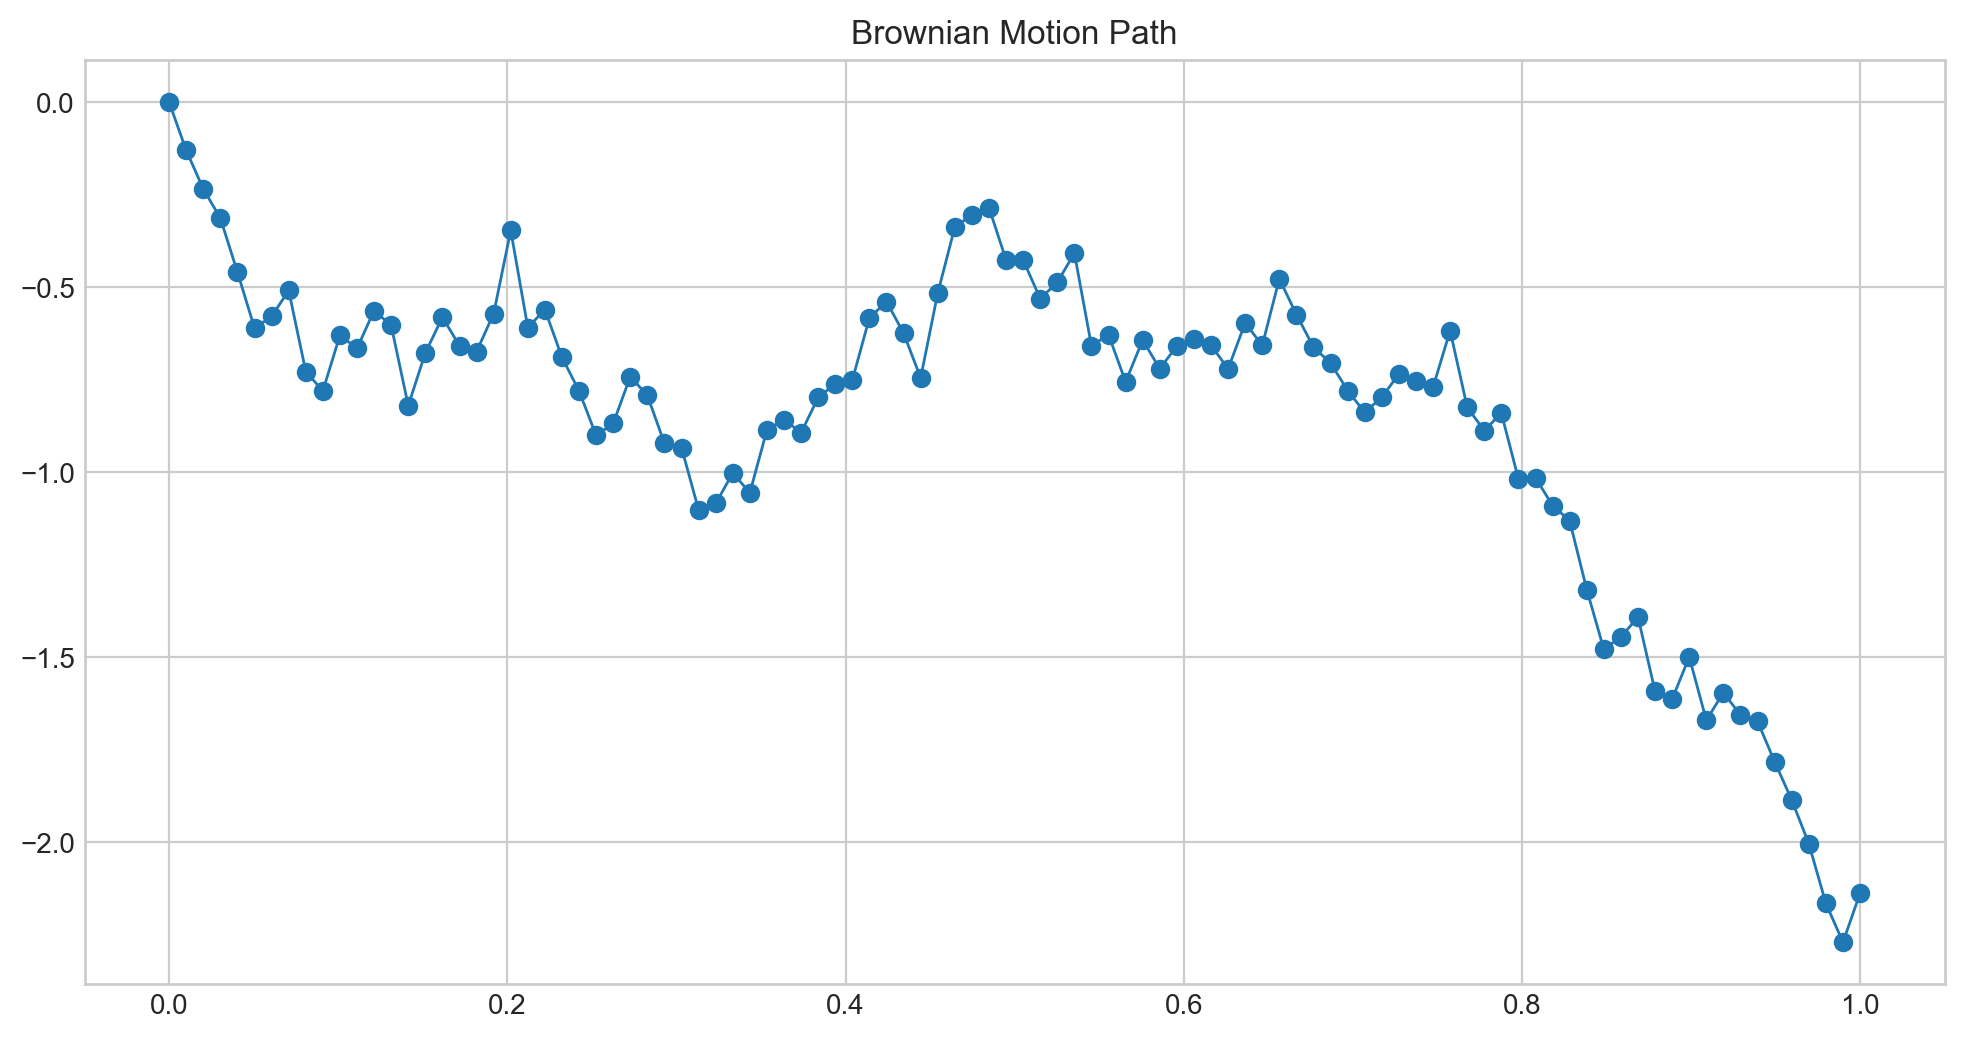

In [41]:
plt.plot(times, Wt, 'o-', lw=1)
plt.title('Brownian Motion Path')
plt.show()

```{note}
In this plot, we are using a linear interpolation to draw the lines between the simulated points. 
```

### Simulating and Visualising Paths

To simulate several paths from a Brownian Motion and visualise them we can use the method `plot` from the `aleatory` library. 




Let's simulate 10 paths over the interval $[0,1]$ using a partition of 100 points. 



`````{admonition} Tip
:class: tip
Remember that  the number of points in the partition is defined by the parameter $n$, while  the number of paths is determined by $N$.
`````

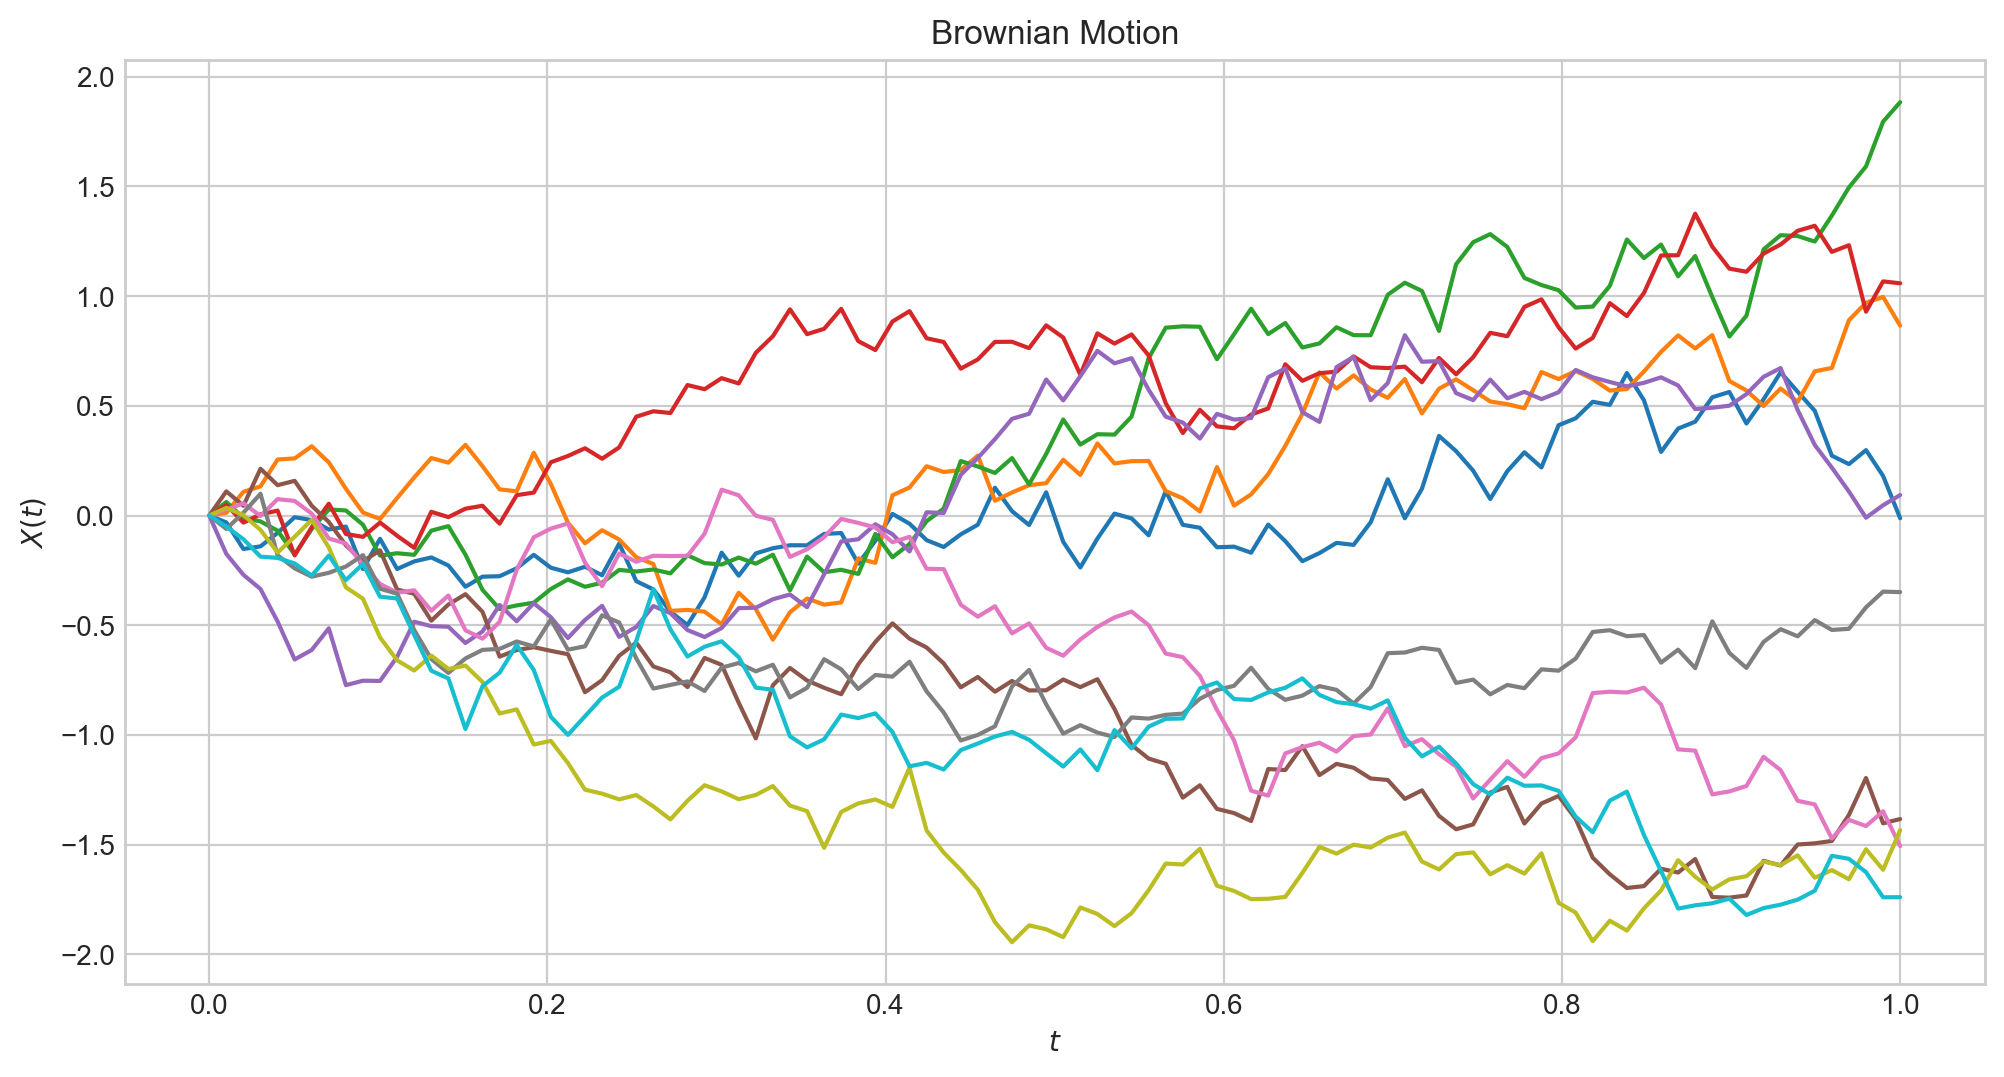

In [42]:
process = BrownianMotion()
process.plot(n=100, N=10)
plt.show()

Similarly, we can define the Brownian Motion over the interval $[0, 10]$ and simulate 50 paths with a partition of size 100.

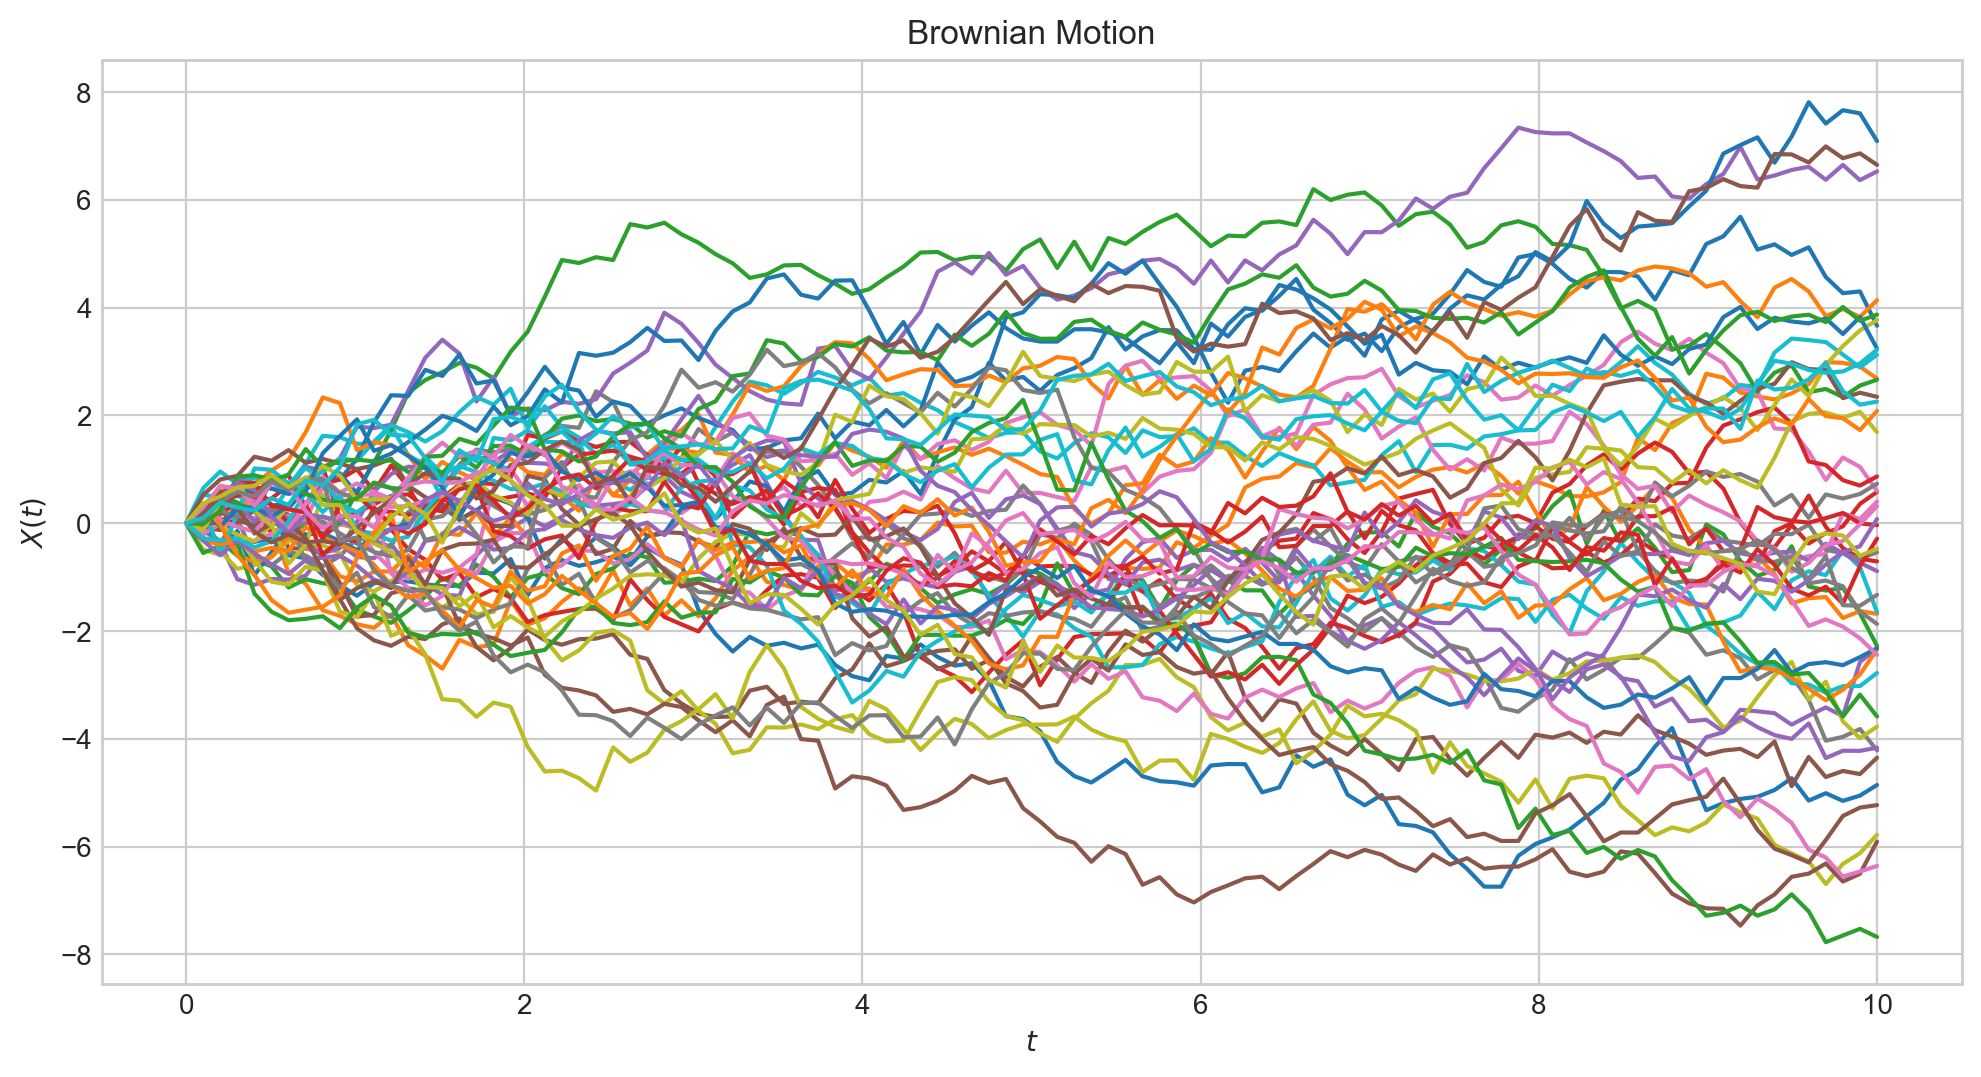

In [43]:
process = BrownianMotion(T=10)
process.plot(n=100, N=50)
plt.show()

## Long Time Behaviour

Almost surely 

\begin{equation}
\lim_{t \rightarrow \infty} \frac{W_t}{t}  = 0.
\end{equation}

This property is the analogous of the Law of Large Numbers and sometimes is referred as such. 

We can visualise this phenomenon by simulating trajectories of the Brownian Motion over a long interval and then  simply plottling the values $\frac{W_t}{t}$. Let's try to do this over the interval $[0, 500]$

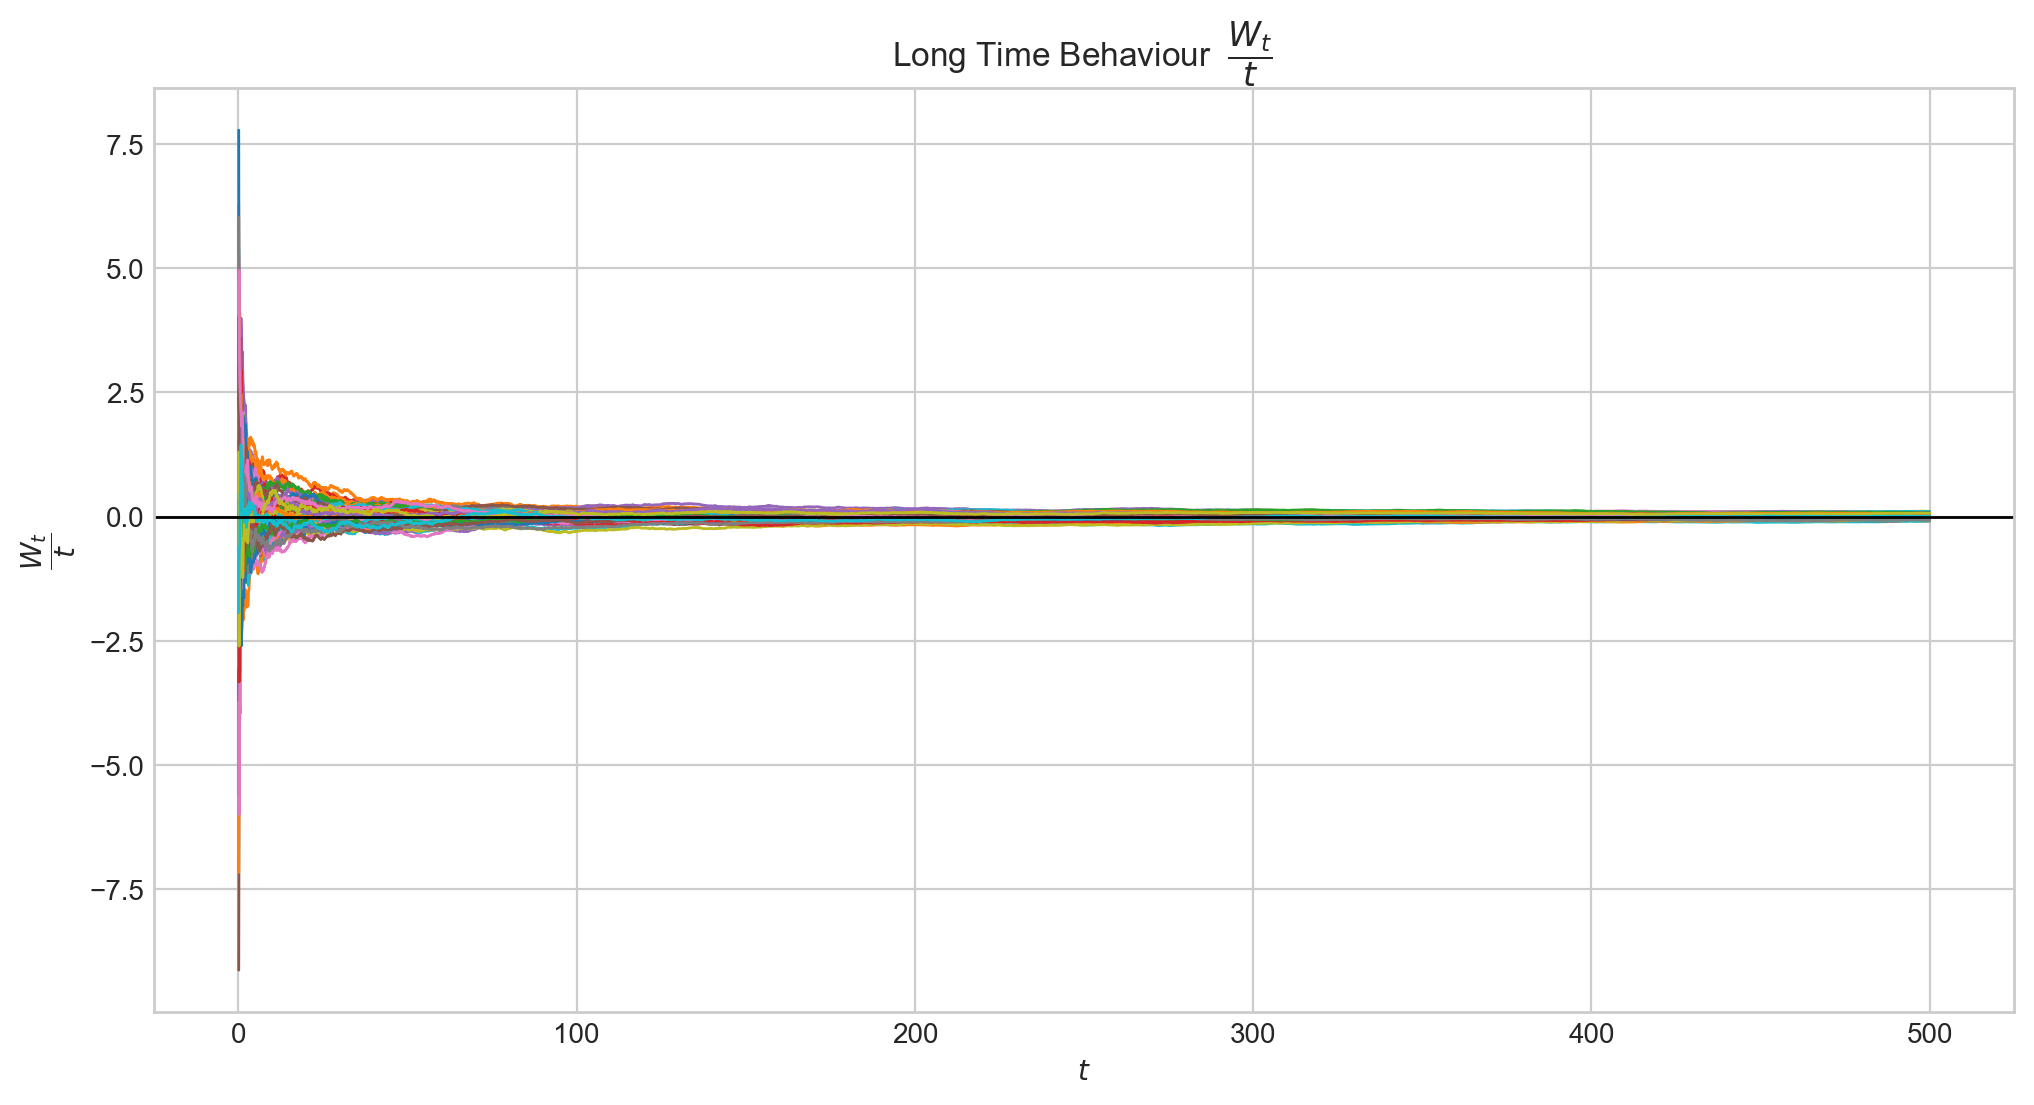

In [44]:
process = BrownianMotion(T=500)
paths = process.simulate(n=5000, N=100)
t = process.times

for w in paths:
    plt.plot(t[1:], w[1:]/t[1:], '-', lw=1)
plt.axhline(y=0, lw=1., color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()

We can zoom-in to see the what was happening when $t$ was not that big e.g. over the interval $[0,5]$ 

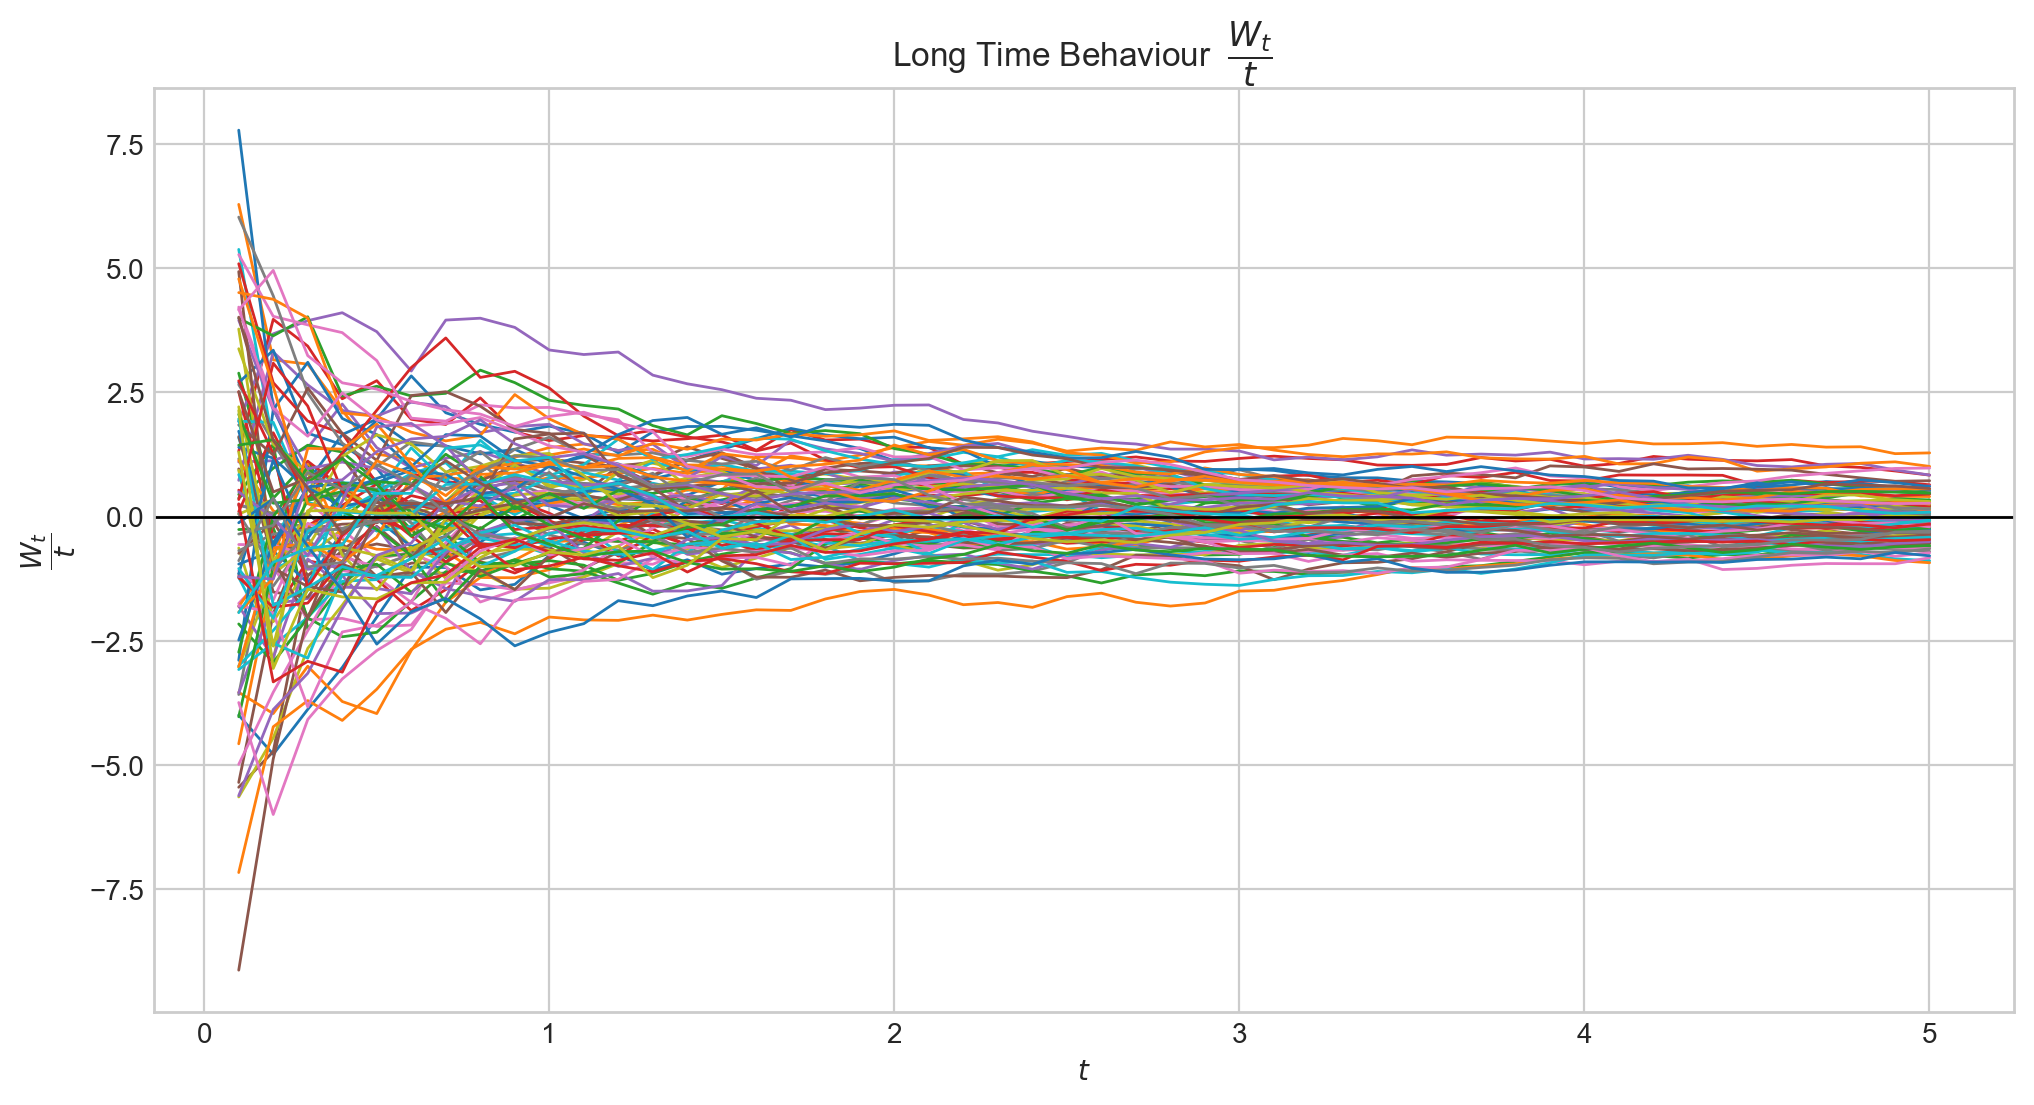

In [45]:
for w in paths:
    plt.plot(t[1:51], w[1:51]/t[1:51], '-', lw=1)
plt.axhline(y=0, lw=1., color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()

We can see that the ratio $\frac{W_t}{t}$ is definitely going towards zero but not quite there yet at $t=5$. 

Now, let's zoom in on the last part of the interval $[0, 500]$, e.g. on $[400, 500]$

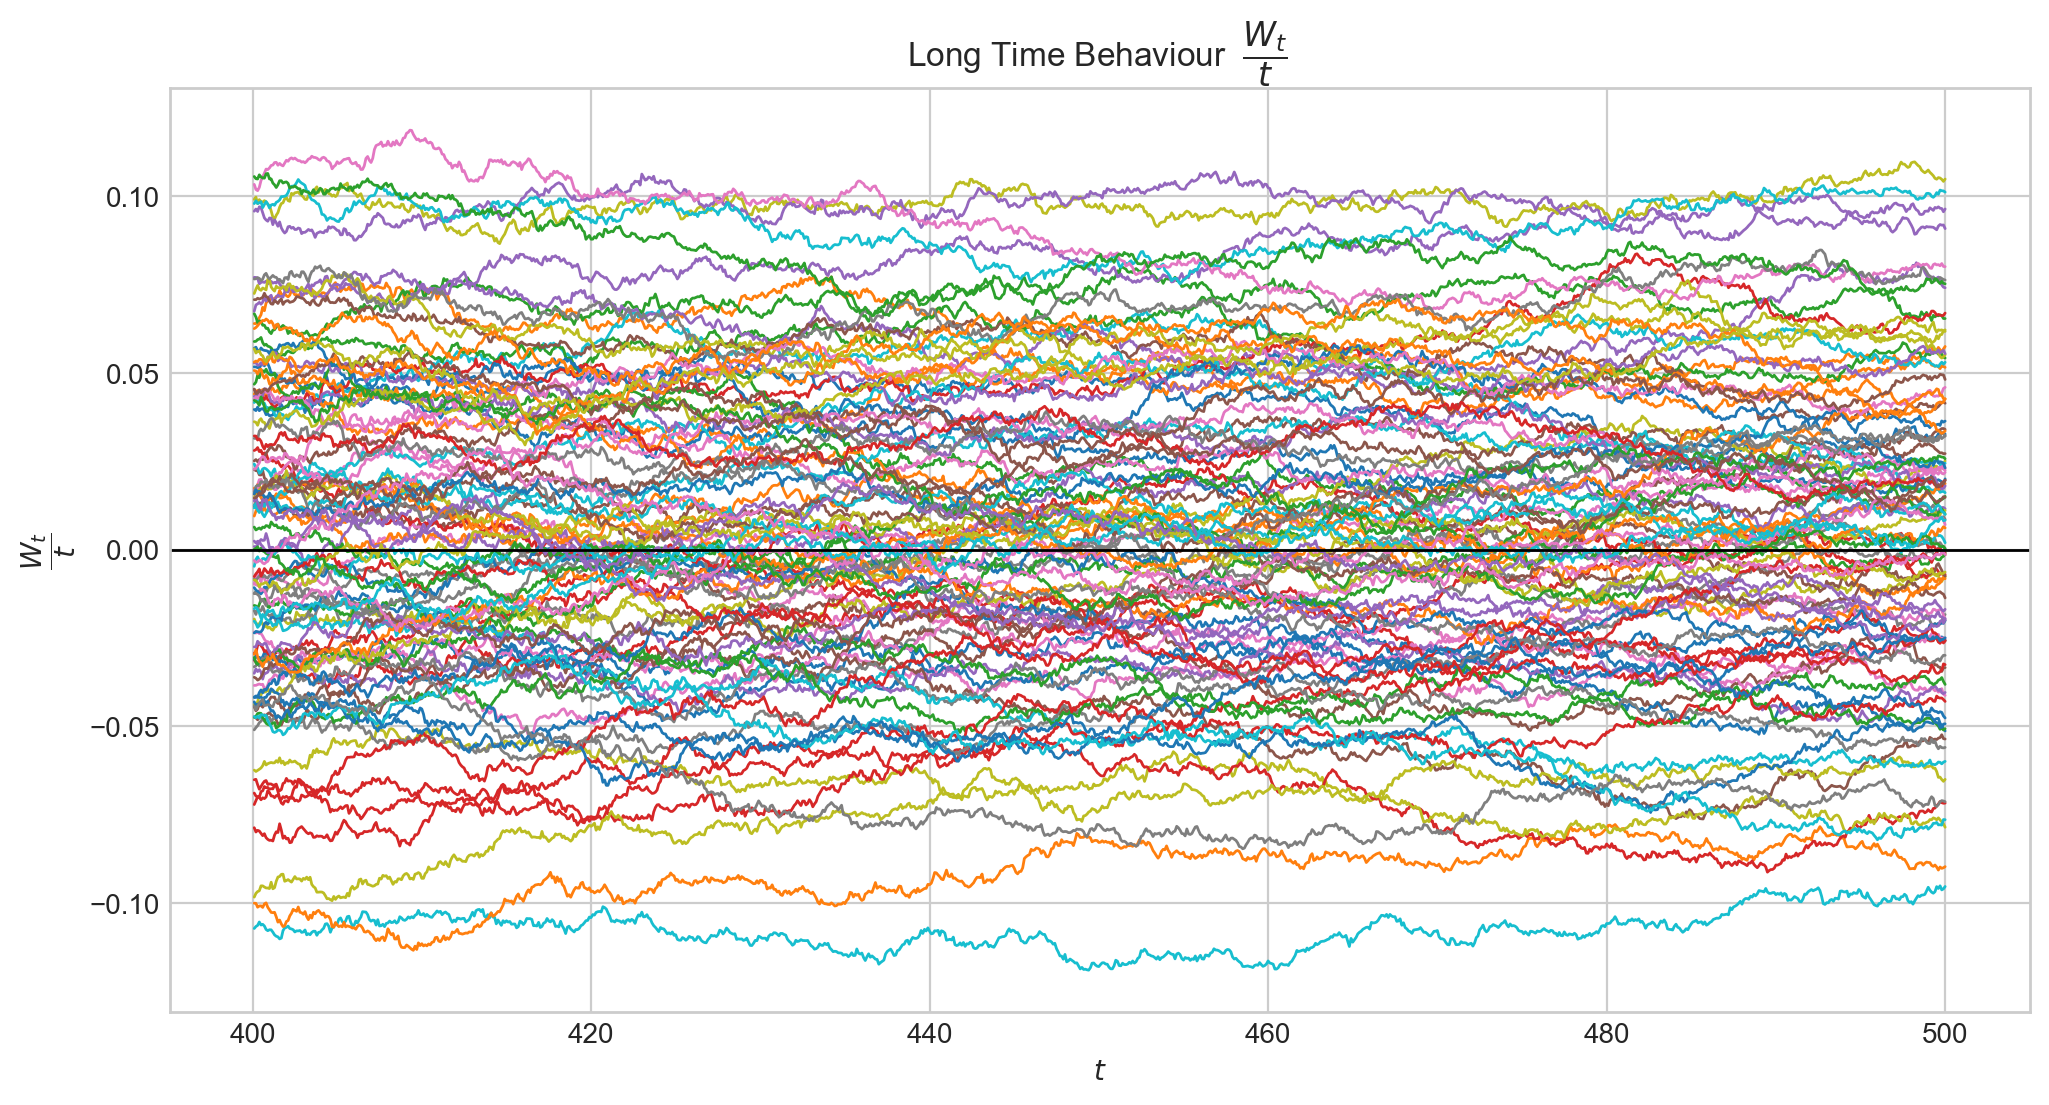

In [46]:
for w in paths:
    plt.plot(t[4000:], w[4000:]/t[4000:], '-', lw=1)
plt.axhline(y=0, lw=1., color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()


Here we can see that the ratio is much closer to zero (around $\pm 0.1$) than before! 
Of course, we are still not quite there yet, but convergence is definitely happening.   

## Reflection Principle
Let us introduce 
\begin{equation*}
M(t) = \sup_{0\leq s\leq t} W_s.
\end{equation*}
If $a>0$, then 
\begin{equation}
\mathbf{P}\left( M(t) \geq a \right) = 2P(W_t\geq a) = P(|W_t|\geq a)
\end{equation}

You can find the proof here: [Reflection Principle (Wiener process)- Wiki](https://en.wikipedia.org/wiki/Reflection_principle_(Wiener_process)).

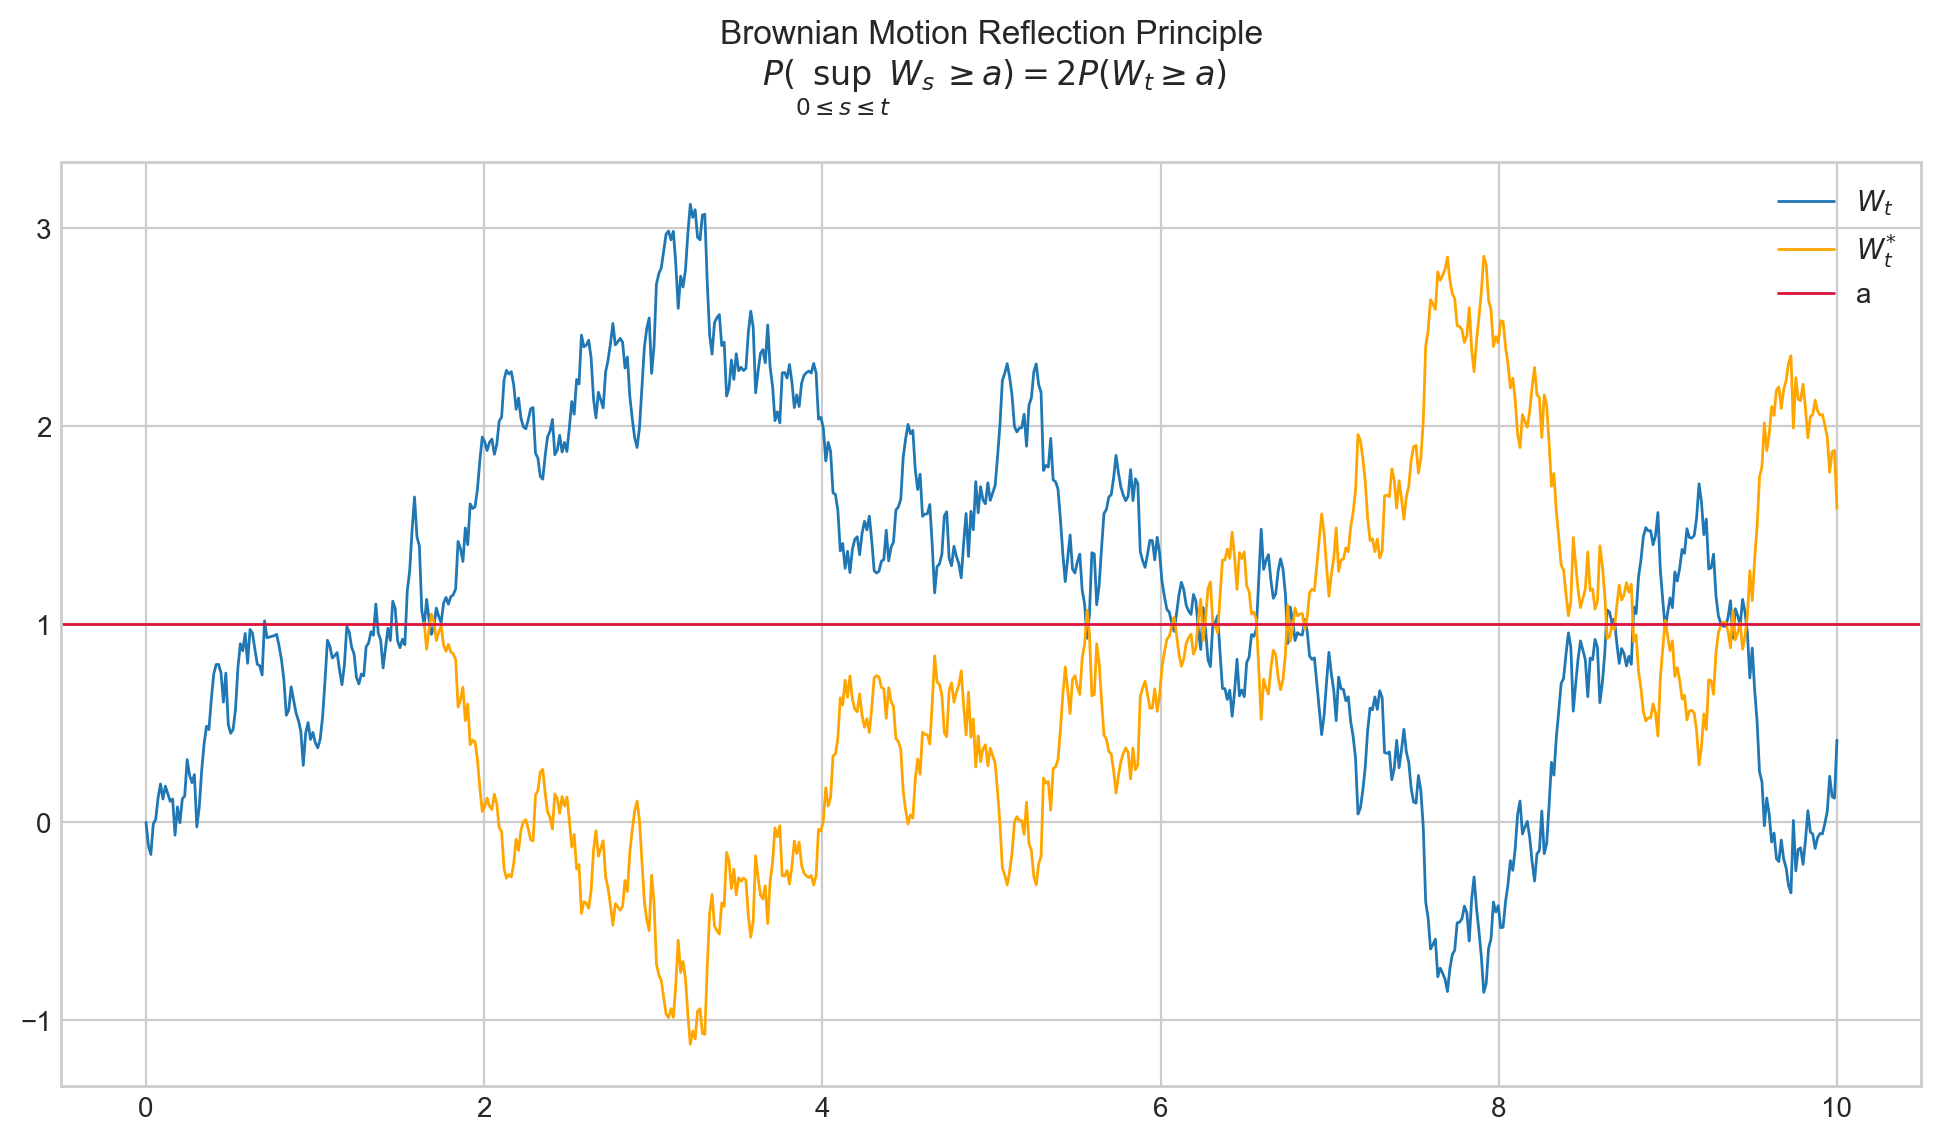

In [47]:
process = BrownianMotion(T=10, rng=np.random.default_rng(seed=123))
bms = process.sample(n=700)
ts = process.times
a = 1.0
fht = np.where(np.isclose(bms, a, rtol=0.01))[0][0]
plt.figure()
plt.plot(ts, bms, '-', lw=1, label="$W_t$")
plt.plot(ts[fht:], -bms[fht:] + 2*a, '-', lw=1, color='orange', label="$W_t^{*}$")
plt.axhline(y=a, lw=1, color='crimson', label='a')
plt.title(
    'Brownian Motion Reflection Principle\n $P(\sup_{0\leq s  \leq t} W_s \geq a ) = 2P(W_t\geq a)$ \n')
plt.legend()
plt.show()

## Visualisation

To finish this note, let's take a look at a simulation from the Brownian Motion.

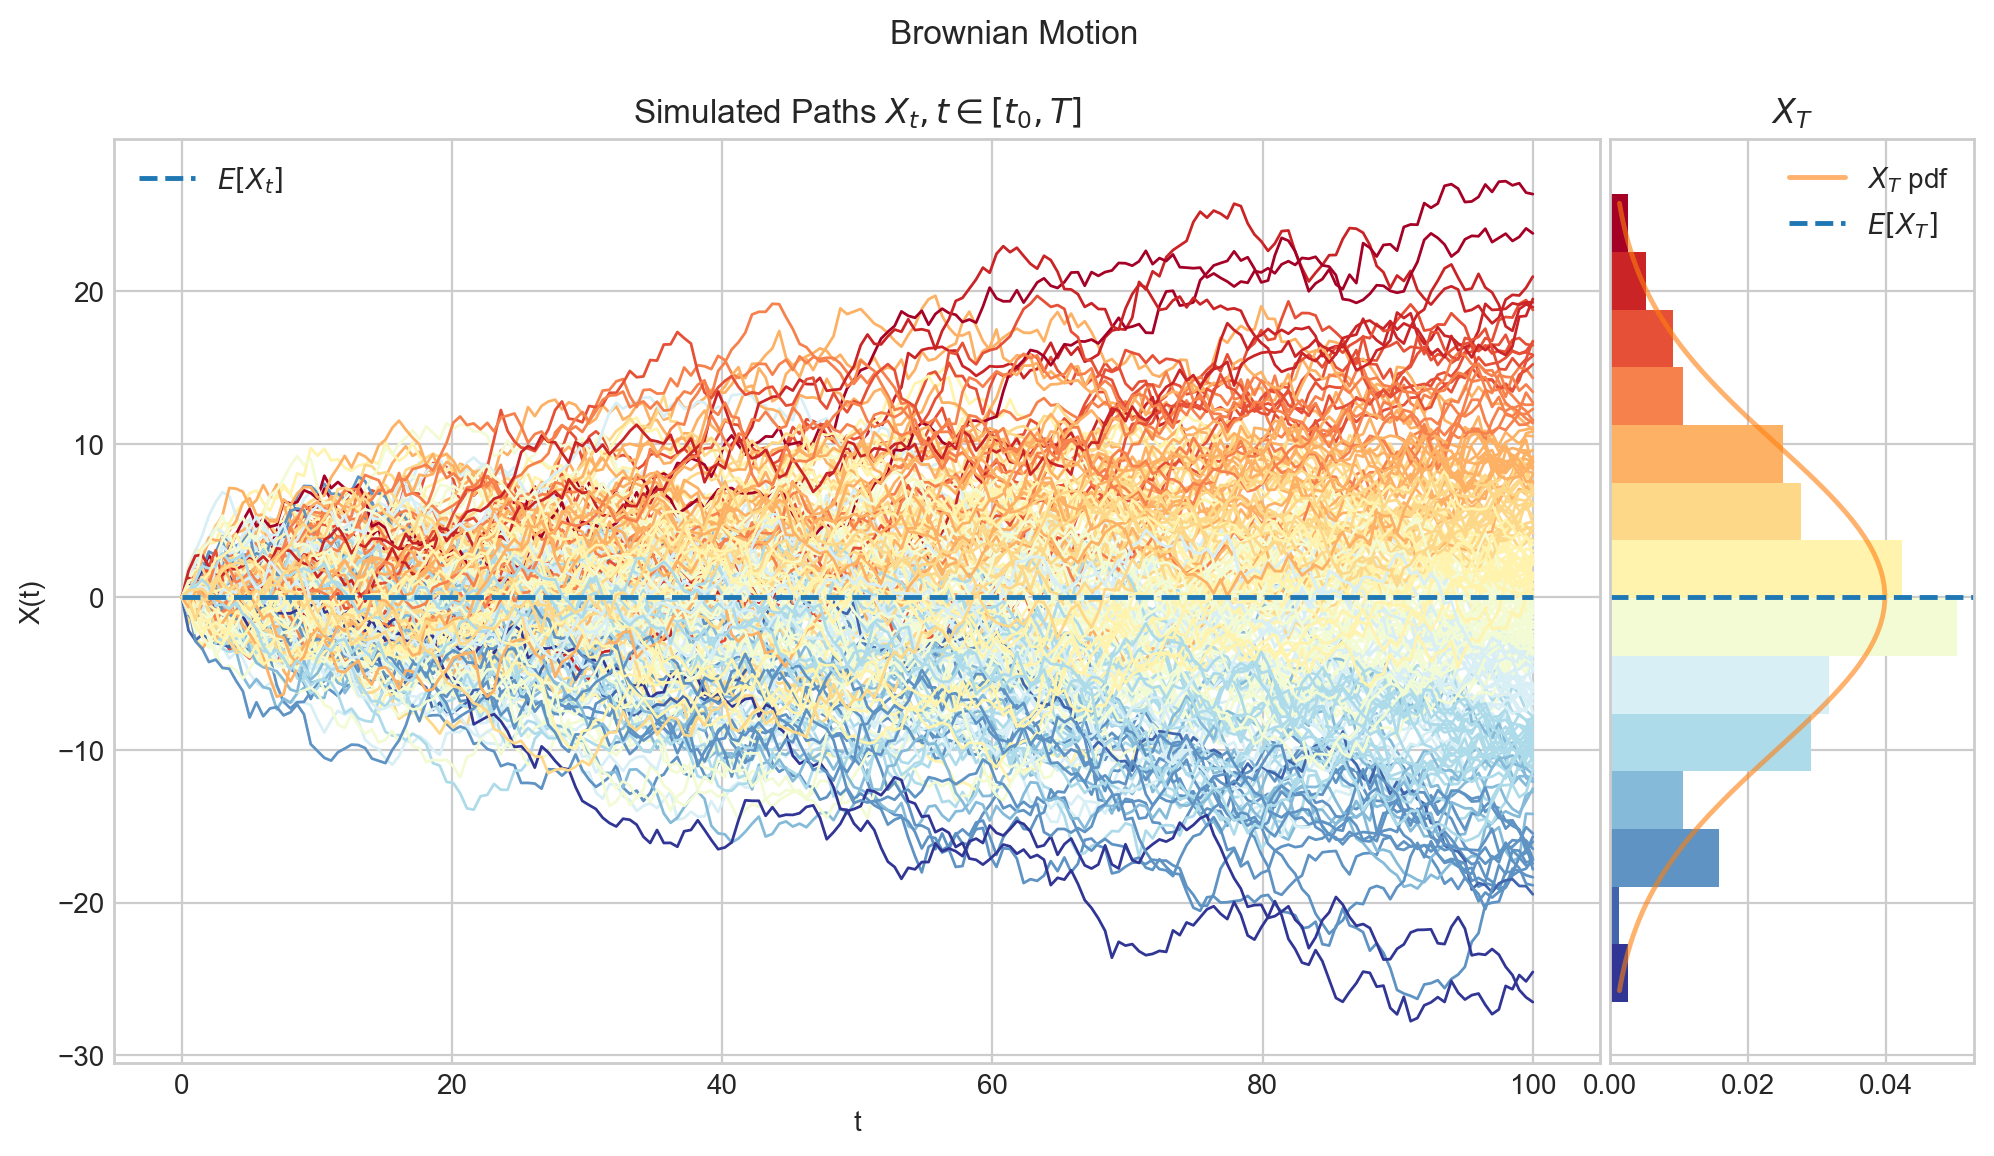

In [48]:
process = BrownianMotion(T=100)
process.draw(n=200, N=200)
plt.show()

## References and Further Reading

- [The Brownian Movement](https://feynmanlectures.caltech.edu/I_41.html) by Feynman, R. (1964) in "The Feynman Lectures of Physics", Volume I. pp. 41–1.
- [Brownian Motion and Stochastic Calculus](https://link.springer.com/book/10.1007/978-1-4612-0949-2) by Ioannis Karatzas, and Steven E. Shreve (1998), Springer.
- [Brownian Motion](https://www.stat.berkeley.edu/~aldous/205B/bmbook.pdf) Notes by Peter Morters and Yuval Peres (2008).
- [The Zero Set and Arcsine Laws of Brownian Motion](https://www.stat.berkeley.edu/~pitman/s205s03/lecture18.pdf) by Lecturer: Manjunath Krishnapur.
